In [3]:
import pandas as pd
import numpy as np
from IPython.display import display
import pyarrow as pa

import pyarrow.parquet as pq
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.preprocessing import MinMaxScaler

from math import sqrt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

2024-04-07 04:50:10.383332: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [87]:
# !pip install pyarrow
# !pip install tensorflow
# !pip install statsmodels
# !pip install keras
# !pip install dask[complete]
# !pip install sodapy
!pip install folium


In [2]:
parquet_file=['data/yellow_tripdata_2022-01.parquet','data/yellow_tripdata_2022-02.parquet','data/yellow_tripdata_2022-03.parquet','data/yellow_tripdata_2022-04.parquet','data/yellow_tripdata_2022-05.parquet','data/yellow_tripdata_2022-06.parquet']
Monthly_all_Data=[]

In [3]:
#reads a parquet file then adds the dataframe to a list of dataframes called monthly_all_Data
for i in range(6):
    
    ride_Data = pd.read_parquet(parquet_file[i],engine='pyarrow')
    Monthly_all_Data.append(ride_Data)


In [4]:
new=pd.concat(Monthly_all_Data,ignore_index=True)

In [5]:
pq.write_table(pa.Table.from_pandas(new), 'data/merged_data.parquet')

In [2]:
#start code from here
all_Data = pd.read_parquet('data/merged_data.parquet', engine='pyarrow')

In [3]:
all_Data.tail(11656102)


NameError: name 'all_Data' is not defined

In [8]:
(all_Data.isna()).sum()

VendorID                      0
tpep_pickup_datetime          0
tpep_dropoff_datetime         0
passenger_count          291055
trip_distance                 0
RatecodeID               291055
store_and_fwd_flag       291055
PULocationID                  0
DOLocationID                  0
payment_type                  0
fare_amount                   0
extra                         0
mta_tax                       0
tip_amount                    0
tolls_amount                  0
improvement_surcharge         0
total_amount                  0
congestion_surcharge     291055
airport_fee              291055
dtype: int64

In [9]:
 print(all_Data.shape)

(9071244, 19)


In [10]:
all_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9071244 entries, 0 to 9071243
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

In [10]:
all_Data.isnull().sum()

VendorID                       0
tpep_pickup_datetime           0
tpep_dropoff_datetime          0
passenger_count          1368303
trip_distance                  0
RatecodeID               1368303
store_and_fwd_flag       1368303
PULocationID                   0
DOLocationID                   0
payment_type                   0
fare_amount                    0
extra                          0
mta_tax                        0
tip_amount                     0
tolls_amount                   0
improvement_surcharge          0
total_amount                   0
congestion_surcharge     1368303
airport_fee              1368303
dtype: int64

In [7]:
all_Data = all_Data.drop_duplicates(inplace=True)



In [8]:
 print(all_Data)

None


In [11]:
filt= (all_Data['passenger_count'].isna()) & \
    (all_Data['RatecodeID'].isna()) & \
    (all_Data['store_and_fwd_flag'].isna()) & \
    (all_Data['congestion_surcharge'].isna()) &\
    (all_Data['airport_fee'].isna())
removed_na_values=all_Data[filt]
removed_na_values.shape

(291055, 19)

In [5]:
all_Data.tail(10000000)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
29656098,2,2022-10-04 09:13:38,2022-10-04 09:28:37,1.0,1.72,1.0,N,229,137,1,10.50,0.0,0.5,2.76,0.0,0.3,16.56,2.5,0.0
29656099,2,2022-10-04 09:31:44,2022-10-04 09:36:17,1.0,0.47,1.0,N,137,170,1,4.50,0.0,0.5,1.95,0.0,0.3,9.75,2.5,0.0
29656100,2,2022-10-04 09:45:11,2022-10-04 09:57:23,1.0,0.43,1.0,N,186,164,1,8.50,0.0,0.5,2.36,0.0,0.3,14.16,2.5,0.0
29656101,2,2022-10-04 09:59:39,2022-10-04 10:09:41,1.0,1.39,1.0,N,164,249,2,7.50,0.0,0.5,0.00,0.0,0.3,10.80,2.5,0.0
29656102,2,2022-10-04 09:26:12,2022-10-04 09:43:42,1.0,5.23,1.0,N,143,244,1,19.50,0.0,0.5,2.00,0.0,0.3,24.80,2.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39656093,2,2022-12-31 23:46:00,2023-01-01 00:11:00,NaN,11.56,NaN,None,16,36,0,39.55,0.0,0.5,8.21,0.0,1.0,49.26,NaN,NaN
39656094,2,2022-12-31 23:13:24,2022-12-31 23:29:08,NaN,5.06,NaN,None,75,50,0,26.23,0.0,0.5,0.00,0.0,1.0,30.23,NaN,NaN
39656095,2,2022-12-31 23:00:49,2022-12-31 23:26:57,NaN,13.35,NaN,None,168,197,0,47.73,0.0,0.5,9.85,0.0,1.0,59.08,NaN,NaN
39656096,1,2022-12-31 23:02:50,2022-12-31 23:16:05,NaN,0.00,NaN,None,238,116,0,12.74,0.0,0.5,0.00,0.0,1.0,16.74,NaN,NaN


In [3]:
#removing store_and_fwd_flag
all_Data.drop(all_Data.columns[[5,6,9,10,11,12,13,14,15,18,17]], axis=1,inplace=True)


In [4]:
display(all_Data)
all_Data.info()
all_Data.shape

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,total_amount
0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,2.0,3.80,142,236,21.95
1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.0,2.10,236,42,13.30
2,2,2022-01-01 00:53:21,2022-01-01 01:02:19,1.0,0.97,166,166,10.56
3,2,2022-01-01 00:25:21,2022-01-01 00:35:23,1.0,1.09,114,68,11.80
4,2,2022-01-01 00:36:48,2022-01-01 01:14:20,1.0,4.30,68,163,30.30
...,...,...,...,...,...,...,...,...
19817578,1,2022-06-30 23:45:51,2022-06-30 23:51:48,NaN,0.00,148,256,15.00
19817579,2,2022-06-30 23:25:00,2022-06-30 23:40:00,NaN,5.01,79,262,27.35
19817580,2,2022-06-30 23:29:00,2022-06-30 23:37:00,NaN,1.55,164,79,16.43
19817581,2,2022-06-30 23:24:15,2022-06-30 23:50:19,NaN,5.30,211,239,27.64


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19817583 entries, 0 to 19817582
Data columns (total 8 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   PULocationID           int64         
 6   DOLocationID           int64         
 7   total_amount           float64       
dtypes: datetime64[us](2), float64(3), int64(3)
memory usage: 1.2 GB


(19817583, 8)

In [10]:
filt0= (all_Data['trip_distance'] ==0.00 ) | \
    (all_Data['total_amount'] ==0.00) | \
    (all_Data['total_amount'] >=200)| \
    (all_Data['trip_distance']>=100)
     
    
removed_0_values=all_Data[filt0]
removed_0_values.shape


(105253, 8)

In [5]:
all_Data.drop(all_Data[all_Data['trip_distance'] <= 0.00].index,axis=0,inplace=True) 
all_Data.drop(all_Data[all_Data['total_amount'] <= 0.00].index,axis=0,inplace=True) 
all_Data.drop(all_Data[all_Data['trip_distance'] >= 100].index,axis=0,inplace=True) 
all_Data.drop(all_Data[all_Data['total_amount'] >= 200].index,axis=0,inplace=True) 




In [6]:
all_Data["Duration"]=(all_Data['tpep_dropoff_datetime'])-(all_Data['tpep_pickup_datetime'])

In [14]:
filtDuration = (all_Data['Duration'] >= '0 days 04:00:00')
removed_1=all_Data[filtDuration]
removed_1.shape
all_Data.drop(all_Data[all_Data['Duration'] >= '0 days 02:00:00'].index,axis=0,inplace=True)
all_Data.drop(all_Data[all_Data['Duration'] <= '0 days 00:00:00'].index,axis=0,inplace=True)


In [7]:
all_Data.head(1000000000)


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,total_amount,Duration
0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,2.0,3.80,142,236,21.95,0 days 00:17:49
1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.0,2.10,236,42,13.30,0 days 00:08:24
2,2,2022-01-01 00:53:21,2022-01-01 01:02:19,1.0,0.97,166,166,10.56,0 days 00:08:58
3,2,2022-01-01 00:25:21,2022-01-01 00:35:23,1.0,1.09,114,68,11.80,0 days 00:10:02
4,2,2022-01-01 00:36:48,2022-01-01 01:14:20,1.0,4.30,68,163,30.30,0 days 00:37:32
...,...,...,...,...,...,...,...,...,...
19817577,2,2022-06-30 23:28:00,2022-06-30 23:55:00,NaN,5.13,4,37,33.84,0 days 00:27:00
19817579,2,2022-06-30 23:25:00,2022-06-30 23:40:00,NaN,5.01,79,262,27.35,0 days 00:15:00
19817580,2,2022-06-30 23:29:00,2022-06-30 23:37:00,NaN,1.55,164,79,16.43,0 days 00:08:00
19817581,2,2022-06-30 23:24:15,2022-06-30 23:50:19,NaN,5.30,211,239,27.64,0 days 00:26:04


In [8]:
all_Data['passenger_count']=1

In [16]:
pq.write_table(pa.Table.from_pandas(all_Data), 'data/cleaned_data_3months.parquet')

In [4]:
#start code from here
df = pd.read_parquet('data/cleaned_data_3months.parquet', engine='pyarrow')

In [5]:
df['Duration'] = df['Duration'].dt.total_seconds()/60

In [4]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,total_amount,Duration
0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,1,3.80,142,236,21.95,17.816667
1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1,2.10,236,42,13.30,8.400000
2,2,2022-01-01 00:53:21,2022-01-01 01:02:19,1,0.97,166,166,10.56,8.966667
3,2,2022-01-01 00:25:21,2022-01-01 00:35:23,1,1.09,114,68,11.80,10.033333
4,2,2022-01-01 00:36:48,2022-01-01 01:14:20,1,4.30,68,163,30.30,37.533333


In [6]:
df.drop(df.columns[[0,2,6]], axis=1,inplace=True)


In [7]:
# Initialize an empty list to store rows
rows = []

for i in range(266):
    filt = (df['PULocationID'] == i)
    removed_na_values = df[filt]
    
    total_pickups = removed_na_values.shape[0]
    percentage_of_pickups = (total_pickups / 8923727) * 100
    row={'PULocationID': i, 'Total_pickups': total_pickups, 'percentage_of_pickups': percentage_of_pickups}
    # Append data to the list of rows
    rows.append(row)

# Concatenate the list of rows into a DataFrame
location = pd.concat([location, pd.DataFrame(rows)], ignore_index=True)

location.head(265)


NameError: name 'location' is not defined

In [7]:
import pandas as pd
import dask.dataframe as dd
import warnings

# Suppress warnings temporarily
with warnings.catch_warnings():
    warnings.simplefilter("ignore")

    # Assuming your DataFrame is already defined as df
    df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'], format="%m/%d/%Y %I:%M:%S %p")
    df.set_index('tpep_pickup_datetime', inplace=True)

    # Convert to Dask dataframe
    ddf = dd.from_pandas(df, npartitions=4)  # You can adjust the number of partitions as needed

    # Columns to sum up
    columns_to_sum = ['passenger_count', 'trip_distance', 'total_amount', 'Duration'] 

    # Resample durations
    resample_duration = ["10min"]  # You can add more durations if needed

    for dur in resample_duration:
        print("resampling by ", dur)
        # Group by PULocationID and resample for each duration
        ten_min_intervals = ddf.groupby("PULocationID").apply(lambda x: x.resample(dur).sum()).compute()
        
        # If you want to compute the result (assuming you're using Dask)
        # ten_min_intervals = ten_min_intervals.compute()
        
        ten_min_intervals = ten_min_intervals.drop("PULocationID", axis=1)
        
      
       


resampling by  10min


In [8]:


# Convert the strings to timestamps
start_time = pd.Timestamp('2022-01-01 00:00:00')
end_time = pd.Timestamp('2022-01-01 00:09:59')

# Sort the index
ten_min_intervals_filtered = ten_min_intervals.sort_index()

# Filter for PULocationID equal to 237 and times between start_time and end_time
passenger_count_237 = ten_min_intervals_filtered.loc[(237, slice(start_time, end_time)), 'passenger_count'].iloc[0]

# Now passenger_count_237 contains the passenger count for PULocationID 237 and the specified time range

# Filter for PULocationID equal to 237 and times between start_time and end_time in original DataFrame df
df_filtered = df[(df['PULocationID'] == 237) & (df.index >= start_time) & (df.index <= end_time)]

# Check if the lengths of both DataFrames are the same
if len(df_filtered) == passenger_count_237:
    print("Both DataFrames have the same number of rows.")
else:
    print("Number of rows in the DataFrames are different.")


Both DataFrames have the same number of rows.


In [9]:


# Filter out dates before '2022-01-01 00:00:00'
ten_min_intervals_filtered = ten_min_intervals_filtered[ten_min_intervals_filtered.index.get_level_values('tpep_pickup_datetime') >= pd.Timestamp('2022-01-01 00:00:00')]

# Now ten_min_intervals_filtered contains only the rows where the 'tpep' part of the index is on or after '2022-01-01 00:00:00'


In [167]:
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Define function to prepare data for LSTM
def prepare_data(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size, 0])  # Passenger count is the first column
    return np.array(X), np.array(y)



# Define function to train and evaluate model for a given location
def train_and_evaluate(location_id, window_size):
    # Filter data for specified location
    data_location = ten_min_intervals.loc[location_id]

    # Separate training and testing data
    train_data = data_location.loc['2022-01-01':'2022-01-31']
    test_data = data_location.loc['2022-02-01':'2022-03-31']

    # Normalize data
    scaler = MinMaxScaler()
    train_data_scaled = scaler.fit_transform(train_data)
    test_data_scaled = scaler.transform(test_data)

    # Prepare training data
    X_train, y_train = prepare_data(train_data_scaled, window_size)

    # Prepare testing data
    X_test, y_test = prepare_data(test_data_scaled, window_size)

    # Define LSTM model architecture
    model = Sequential([
        LSTM(units=50, activation='relu', input_shape=(window_size, len(data_location.columns))),
        Dense(units=1)
    ])

    # Compile model
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Train model
    model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)  # Set verbose=1 for training progress
    y_pred = model.predict(X_test)
    y_pred = y_pred[:len(y_test)]
    # Inverse transform to get actual predictions
    y_pred_inv = scaler.inverse_transform(np.concatenate((X_test[:, -1, 1:], y_pred), axis=1))[:, -1]

    # Inverse transform test data for evaluation
    y_test_inv = scaler.inverse_transform(np.concatenate((X_test[:, -1, 1:], y_test.reshape(-1, 1)), axis=1))[:, -1]

    # Evaluate model
    rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
    print(f"Test Loss for location {location_id}: {rmse}")




266/266 [==============================] - 1s 3ms/step
Test Loss for location 132: 512.633912523876
266/266 [==============================] - 2s 3ms/step
Test Loss for location 142: 185.74578578460685
266/266 [==============================] - 2s 7ms/step
Test Loss for location 42: 162.7047018208978
266/266 [==============================] - 2s 5ms/step
Test Loss for location 237: 278.25721109095264


In [10]:
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from keras.models import Sequential

from keras.optimizers import Adam


from keras.layers import LSTM, Dense, Dropout, Bidirectional



def prepare_data2(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size, 1])  # Passenger count is the first column
    return np.array(X), np.array(y)




# Define function to train and evaluate model for a given location
def train_and_evaluate2(location_id, window_size, epochs, batch_size, learning_rate):
    # Filter data for specified location
    start_time_train = pd.Timestamp('2022-01-01 00:00:00')
    end_time_train = pd.Timestamp('2022-03-01 00:00:00')
    start_time_test = pd.Timestamp('2022-03-01 00:00:10')
    end_time_test = pd.Timestamp('2022-06-30 00:00:00')
    
    data_location = ten_min_intervals_filtered.loc[(location_id, slice(None)), :]
    # Reset index 
    
    data_location.reset_index(inplace=True)
    data_location[('tpep_pickup_datetime')] = pd.to_datetime(data_location[('tpep_pickup_datetime')])  
    
    # Separate training and testing data
    train_data = data_location[(data_location[('tpep_pickup_datetime')] >= start_time_train) & (data_location[('tpep_pickup_datetime')] <= end_time_train)]
    test_data = data_location[(data_location[('tpep_pickup_datetime')] >= start_time_test) & (data_location[('tpep_pickup_datetime')] <= end_time_test)]
    train_data.set_index(('tpep_pickup_datetime'), inplace=True)
    test_data.set_index(('tpep_pickup_datetime'), inplace=True)
    # Normalize data
    scaler = MinMaxScaler()
    
    train_data_scaled = scaler.fit_transform(train_data)
    test_data_scaled = scaler.transform(test_data)
    
    # Prepare training data
    X_train, y_train = prepare_data2(train_data_scaled, window_size)

    # Prepare testing data
    X_test, y_test = prepare_data2(test_data_scaled, window_size)

    # Define LSTM model architecture
    model = Sequential([
        Bidirectional(LSTM(units=128, activation='tanh', return_sequences=True), input_shape=(window_size, 5)),
        Dropout(0.2),  # Adding dropout regularization
        Bidirectional(LSTM(units=64, activation='tanh')),
        Dense(units=1)
    ])
    optimizer = Adam(learning_rate=learning_rate)
    # Compile model
    model.compile(optimizer, loss='mean_squared_error')

    # Train model
    history = model.fit(X_train, y_train, epochs, batch_size, verbose=1)  # Set verbose=1 for training progress
    y_pred = model.predict(X_test)
    y_pred = y_pred[:len(y_test)]
    Y_test=data_location[(data_location[('tpep_pickup_datetime')] >= start_time_test) & (data_location[('tpep_pickup_datetime')] <= end_time_test)]


    # Get unique passenger counts from the filtered DataFrame
   
    # y_pred_inv = scaler.inverse_transform(np.concatenate((X_test[:, -1, 1:], y_pred), axis=1))[:, -1]

    # # Inverse transform test data for evaluation
    # y_test_inv = scaler.inverse_transform(np.concatenate((X_test[:, -1, 1:], y_test.reshape(-1, 1)), axis=1))[:, -1]
    # Inverse transform to get actual predictions
    # y_pred_inv = scaler.inverse_transform(y_pred)
    
    # # Inverse transform test data for evaluation
    # y_test_inv = scaler.inverse_transform(X_test[1,:])

    # Evaluate model
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f"Test Loss for location {location_id}: {rmse}")
    return history, y_test, y_pred, test_data 


In [49]:
# Locations to train and evaluate
locations = [num for num in range(59, 266) if num not in (2, 6, 27,30,46,57,58,59)]
locations = [237]


# predictions = {}
# start_date = datetime(2022, 3, 1, 0, 0, 0)
# end_date = datetime(2022, 6, 30, 0, 0, 0)
# index = pd.date_range(start=start_date, end=end_date, freq='10T')
# df = pd.DataFrame(index=index)
# Train and evaluate models for each location
for location_id in locations:

    history, y_test, y_pred, test_data=train_and_evaluate2(location_id, window_size=10, epochs=75, batch_size=4,learning_rate=0.001)
    
    # df.loc[df.index[len(df)-len(y_pred):], f'Predicted_{location_id}'] = y_pred.flatten()  # Assign predicted values

# Displaying the updated DataFrame with predicted values
# df.head()
    

Epoch 1/4
114/114 [==============================] - 13s 51ms/step - loss: 0.0110
Epoch 2/4
114/114 [==============================] - 6s 52ms/step - loss: 0.0049
Epoch 3/4
114/114 [==============================] - 7s 57ms/step - loss: 0.0046
Epoch 4/4
545/545 [==============================] - 9s 12ms/step
Test Loss for location 237: 0.07690801732552732


Epoch 1/4
114/114 [==============================] - 17s 64ms/step - loss: 0.0085
Epoch 2/4
114/114 [==============================] - 7s 64ms/step - loss: 0.0048
Epoch 3/4
114/114 [==============================] - 8s 69ms/step - loss: 0.0046
Epoch 4/4
545/545 [==============================] - 9s 13ms/step
Test Loss for location 237: 0.07214448228040722


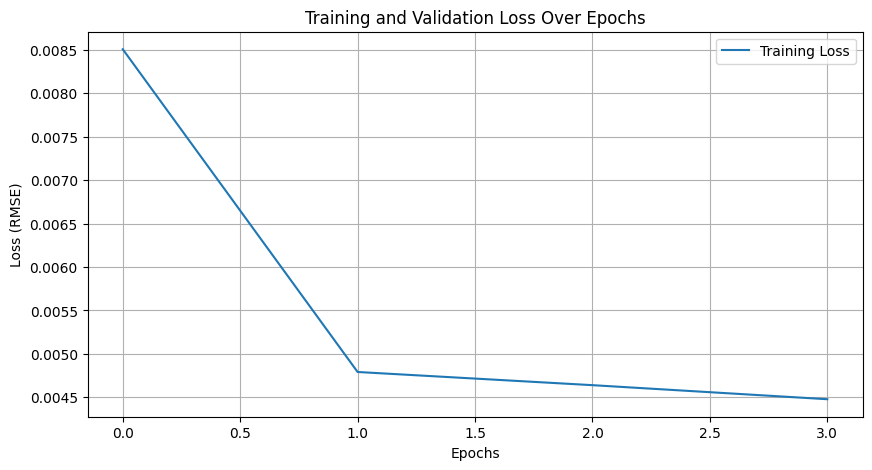

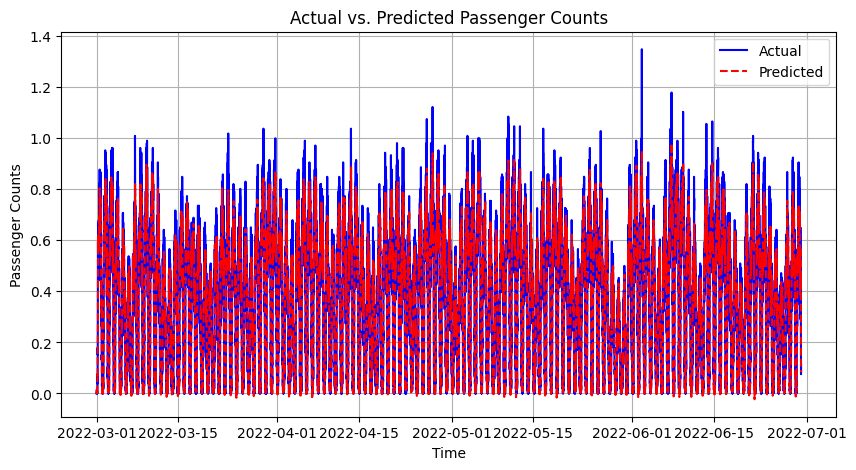

KeyboardInterrupt: 

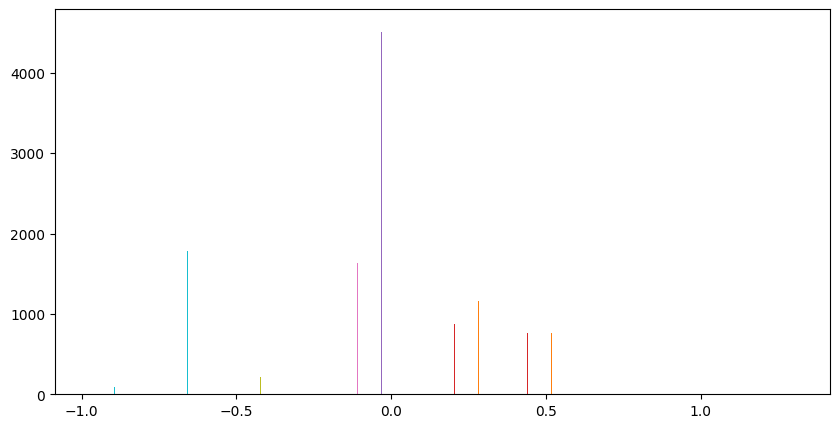

In [62]:
import matplotlib.pyplot as plt
import pandas as pd
history, y_test, y_pred, test_data = train_and_evaluate2(237, window_size=10, epochs=75, batch_size=4,learning_rate=0.001)

# Plot training and validation loss over epochs
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (RMSE)')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.grid(True)
plt.show()

# Define the time range
start_time_test = pd.Timestamp('2022-03-01 00:00:10')
end_time_test = pd.Timestamp('2022-06-30 00:00:00')
num_points = len(y_test)
time_range = pd.date_range(start=start_time_test, end=end_time_test, periods=num_points)

# Plot actual vs. predicted passenger counts
plt.figure(figsize=(10, 5))
plt.plot(time_range, y_test, label='Actual', color='blue')
plt.plot(time_range, y_pred, label='Predicted', color='red', linestyle='--')
plt.xlabel('Time')
plt.ylabel('Passenger Counts')
plt.title('Actual vs. Predicted Passenger Counts')
plt.legend()
plt.grid(True)
plt.show()

# Calculate residuals
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(10, 5))
plt.hist(residuals, bins=30, edgecolor='k')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residuals Plot')
plt.grid(True)
plt.show()

# # Plot time series of actual and predicted passenger counts
# plt.figure(figsize=(12, 6))
# plt.plot(test_data.index, y_test_inv, label='Actual', color='blue')
# plt.plot(test_data.index, y_pred_inv, label='Predicted', color='red', linestyle='--')
# plt.xlabel('Time')
# plt.ylabel('Passenger Counts')
# plt.title('Time Series of Actual and Predicted Passenger Counts')
# plt.legend()
# plt.grid(True)
# plt.show()

In [105]:
import pandas as pd

# Assuming your DataFrame is named df

# Filter the DataFrame for pickup location ID 237
filtered_df = ten_min_intervals_filtered.loc[(237, slice(None)), :]

# Reset index if needed
filtered_df.reset_index(inplace=True)

# Convert the first element of the tuple index to datetime
filtered_df[('tpep_pickup_datetime')] = pd.to_datetime(filtered_df[('tpep_pickup_datetime')])

# Define start and end times
start_time = pd.Timestamp('2022-01-01 00:00:00')
end_time = pd.Timestamp('2022-06-01 00:09:59')

# Filter further to include only rows between start_time and end_time
filtered_df = filtered_df[(filtered_df[('tpep_pickup_datetime')] >= start_time) & (filtered_df[('tpep_pickup_datetime')] <= end_time)]
filtered_df.set_index(('tpep_pickup_datetime'), inplace=True)
# Show the filtered DataFrame
# Find the index of the row with the highest passenger count
max_passenger_index = filtered_df['passenger_count'].idxmax()

# Retrieve the row with the highest passenger count
max_passenger_row = filtered_df.loc[max_passenger_index]

# Print the row
print(max_passenger_row)



PULocationID        237.000000
passenger_count     119.000000
trip_distance       244.330000
total_amount       2178.130000
Duration           1858.016667
Name: 2022-04-27 18:10:00, dtype: float64


In [12]:
print(train_data_scaled1.iloc[1:1+10])

NameError: name 'train_data_scaled1' is not defined

In [163]:
print(train_data_scaled1.iloc[1+10, 1])

0.20754716981132074


In [18]:
import pandas as pd

# Sample data
data = {
    'passengers': [10, 15, 20, 25, 30],
    
}

# Create DataFrame
df = pd.DataFrame(data)
scaler = MinMaxScaler()
# Display DataFrame

df = scaler.fit_transform(df)
L=scaler.inverse_transform(df)
print(df)
print(L)



[[0.  ]
 [0.25]
 [0.5 ]
 [0.75]
 [1.  ]]
[[10.]
 [15.]
 [20.]
 [25.]
 [30.]]


In [39]:
ten_min_intervals_filtered.loc[237]

,passenger_count,trip_distance,total_amount,Duration
tpep_pickup_datetime,,,,
2022-01-01 00:00:00,11,24.24,155.18,81.533333
2022-01-01 00:10:00,23,59.21,377.94,257.700000
2022-01-01 00:20:00,31,80.70,525.59,370.300000
2022-01-01 00:30:00,38,102.91,635.39,443.866667
2022-01-01 00:40:00,32,77.34,536.21,343.833333
...,...,...,...,...
2022-06-30 23:10:00,19,60.61,346.36,232.316667
2022-06-30 23:20:00,20,48.58,324.26,210.766667
2022-06-30 23:30:00,19,46.53,311.35,217.483333


In [53]:
# Assuming y_pred is your numpy array
first_value = y_pred[0, 0]

print("First value:", first_value)

First value: 0.014112195


In [60]:
ten_min_intervals_filtered.info()
start_time_train = pd.Timestamp('2022-01-01 00:00:00')
end_time_train = pd.Timestamp('2022-03-01 00:00:00')
start_time_test = pd.Timestamp('2022-03-01 00:00:10')
end_time_test = pd.Timestamp('2022-06-30 00:00:00')

data_location = ten_min_intervals_filtered.loc[(location_id, slice(None)), :]
# Reset index 

data_location.reset_index(inplace=True)
data_location[('tpep_pickup_datetime')] = pd.to_datetime(data_location[('tpep_pickup_datetime')])  

# Separate training and testing data
train_data = data_location[(data_location[('tpep_pickup_datetime')] >= start_time_train) & (data_location[('tpep_pickup_datetime')] <= end_time_train)]
test_data = data_location[(data_location[('tpep_pickup_datetime')] >= start_time_test) & (data_location[('tpep_pickup_datetime')] <= end_time_test)]
train_data.set_index(('tpep_pickup_datetime'), inplace=True)
test_data.set_index(('tpep_pickup_datetime'), inplace=True)
def prepare_data2(data, window_size):
    X = []
    for i in range(len(data) - window_size):
        X.append(scaler.fit_transform(data.iloc[i:i+window_size]))
        y  = (scaler.fit_transform(data.iloc[i+window_size, 1]))  # Passenger count is the first column
    return np.array(X), np.array(y)

X_train, y_train =prepare_data2(train_data, 10)
print(y_train)


<class 'pandas.core.frame.DataFrame'>
MultiIndex: 6646723 entries, (1, Timestamp('2022-01-01 00:00:00')) to (265, Timestamp('2022-06-30 23:30:00'))
Data columns (total 4 columns):
 #   Column           Dtype  
---  ------           -----  
 0   passenger_count  int64  
 1   trip_distance    float64
 2   total_amount     float64
 3   Duration         float64
dtypes: float64(3), int64(1)
memory usage: 281.5 MB


ValueError: Expected 2D array, got scalar array instead:
array=15.0.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [121]:
def addPolygonToMap(locationid):
    with open('/Users/omarelsisi/Dissertation/data/zones.json', 'r') as file:
        data = json.load(file)
    dataframe = handle_predictions(y_pred)
    Prediction = float(locate_nearest_date(dataframe))
    zone_one_coordinates = None
    for zone in data['zones']:
        if zone['name'] == 'zone_' + locationid:
            zone_one_coordinates = zone['coordinates']
            break
    
    # Create a folium map centered at the coordinates of New York City
    nyc_coordinates = (40.7128, -74.0060)  # Coordinates of New York City (latitude, longitude)
    mymap = folium.Map(location=nyc_coordinates, zoom_start=10)
    if Prediction >= 0.4:
    # Add the polygon to the map
        folium.Polygon(locations=zone_one_coordinates, color='green', fill=True, fill_color='green', fill_opacity=0.4).add_to(mymap)
    elif Prediction < 0.4 & Prediction >= 0.1:
    # Add the polygon to the map
        folium.Polygon(locations=zone_one_coordinates, color='yellow', fill=True, fill_color='yellow', fill_opacity=0.4).add_to(mymap)
    else :
    # Add the polygon to the map
        folium.Polygon(locations=zone_one_coordinates, color='red', fill=True, fill_color='red', fill_opacity=0.4).add_to(mymap)
    # Save the map to an HTML file
    return mymap
    

In [1]:
import folium
import json

# Load the coordinates from the JSON file
with open('/Users/omarelsisi/Dissertation/data/zones.json', 'r') as file:
    data = json.load(file)


zone_one_coordinates = None
for zone in data['zones']:
    if zone['name'] == 'zone_42':
        zone_one_coordinates = zone['coordinates']
        break

# Create a folium map centered at the coordinates of New York City
nyc_coordinates = (40.7128, -74.0060)  # Coordinates of New York City (latitude, longitude)
mymap = folium.Map(location=nyc_coordinates, zoom_start=10)

# Add the polygon to the map
folium.Polygon(locations=zone_one_coordinates, color='red', fill=True, fill_color='red', fill_opacity=0.4).add_to(mymap)

# Save the map to an HTML file
mymap


In [118]:
import pandas as pd
import numpy as np

# Create a range of dates at 10-minute intervals
dates = pd.date_range(start='03-01-2022 00:00:00', end='06-30-2022 00:00:00', freq='10T')

# Sample list of values (replace this with your actual list)
 # Your list of values

# Create a DataFrame with the 'time' column

def handle_predictions(y_pred):
    df_predictions = pd.DataFrame({'time': dates})
    yPred=y_pred
    if len(yPred) < len(dates):
        difference = len(dates) - len(yPred)
        nan_values = [np.nan] * difference
        for nan_val in nan_values:
            yPred = np.append(yPred, nan_val)
        
    elif len(yPred) > len(dates):
        yPred = yPred[:len(dates)] 
    df_predictions['predictions'] = yPred
    df_predictions.dropna(subset=['predictions'], inplace=True)
    
    return df_predictions



In [117]:
from datetime import datetime

def input_date():
    while True:
        try:
            date_str = input("Please enter a date in the format 'YYYY-MM-DD HH:MM:SS': ")
            date = datetime.strptime(date_str, '%Y-%m-%d %H:%M:%S')
            return date
        except ValueError:
            print("Invalid date format. Please try again.")





In [116]:
def locate_nearest_date(df):
    # Convert user input string to datetime object
    user_date = pd.to_datetime(input_date())

    # Round down user input to the nearest 10 minutes
    rounded_date = user_date.floor('10T')

    # Locate the row in DataFrame corresponding to the rounded date
    nearest_row = df.loc[df['time'] == rounded_date]

    if nearest_row.empty:
        print("No exact match found, but nearest date rounded down to the nearest 10 minutes is:")
        rounded_date_str = rounded_date.strftime('%Y-%m-%d %H:%M:%S')
        print(rounded_date_str)
    else:
        return nearest_row['predictions'].iloc[0]




In [123]:
addPolygonToMap('237')

Please enter a date in the format 'YYYY-MM-DD HH:MM:SS':  2022-04-20 12:00:00


In [113]:
dataframe=handle_predictions(y_pred)
print(float(locate_nearest_date(dataframe)))


Please enter a date in the format 'YYYY-MM-DD HH:MM:SS':  2022-04-20 12:00:00


Exact match found at:
0.5815490484237671
